### Import libraries

In [7]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier, risk_models, expected_returns # pip install PyPortfolioOpt
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

### Customize

In [8]:
# customization parameters
my_input_file="0709 Stock Close Price.csv"
total_corpus=1000000
my_limit=0.30
my_optimal_file="0710 optimal_portfolio.csv"
my_pie_chart="0710 optimal_portfolio_allocation.png"


### Set up for optimization

In [9]:
# Load stock data (use your existing dataset path)
data = pd.read_csv(my_input_file, index_col=0, parse_dates=True)

# Calculate expected returns and covariance matrix
mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data)

# Setup Efficient Frontier optimization with constraints
ef = EfficientFrontier(mu, S)

# Individual asset weight limit constraint 
ef.add_constraint(lambda w: w <= my_limit)

C:\Users\veena\AppData\Local\Temp\ipykernel_16484\3782053730.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(my_input_file, index_col=0, parse_dates=True)


### Optimize portfolio

In [10]:
# Optimize portfolio for maximum Sharpe Ratio
ef.max_sharpe()

# Get cleaned portfolio weights
cleaned_weights = ef.clean_weights()

# Discrete allocation of funds based on total corpus
latest_prices = get_latest_prices(data)
da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=total_corpus)
allocation, leftover = da.lp_portfolio()

# Present final allocation
allocation_df = pd.DataFrame.from_dict(allocation, orient='index', columns=['Shares'])
allocation_df['Price per Share'] = latest_prices[allocation_df.index]
allocation_df['Total Investment'] = allocation_df['Shares'] * allocation_df['Price per Share']

### Save and diplay results

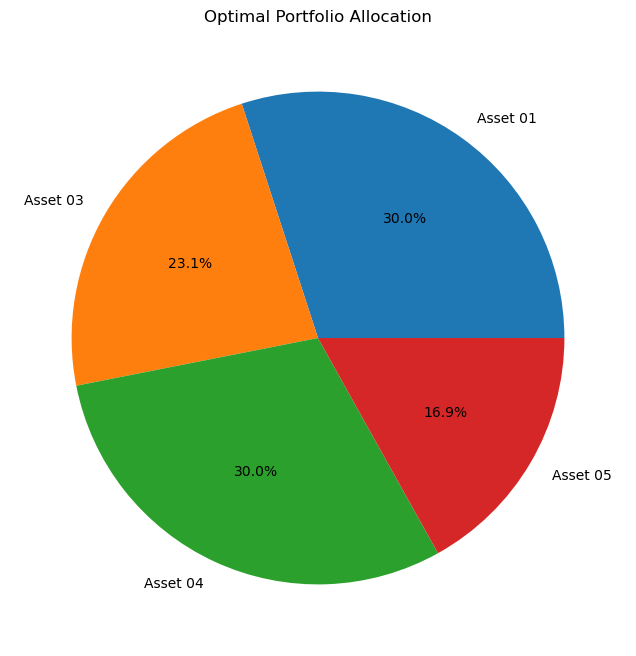

          Shares  Price per Share  Total Investment
Asset 01    1568       191.380951     300085.331055
Asset 03     620       372.501984     230951.229858
Asset 04    1207       248.479996     299915.354843
Asset 05    1764        95.824913     169035.146576
Funds remaining (unallocated): 12.94
Expected annual return: 38.1%
Annual volatility: 34.6%
Sharpe Ratio: 1.10


In [11]:
# Save optimal portfolio allocation to CSV
allocation_df.to_csv(my_optimal_file)

# Pie chart for portfolio allocation
allocation_df['Total Investment'].plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title('Optimal Portfolio Allocation')
plt.ylabel('')
plt.savefig(my_pie_chart)
plt.show()

# Display portfolio performance
print(allocation_df)
print(f"Funds remaining (unallocated): {total_corpus - allocation_df['Total Investment'].sum():.2f}")
#print(f"Expected annual return from optimal portfolio: {expected_return*100:.2f}%")
expected_return, volatility, sharpe_ratio = ef.portfolio_performance(verbose=True)
#print(f"Expected annual return: {expected_return*100:.2f}%")